In [55]:
import numpy as np
import matplotlib.pyplot as plt

name_str='normal-distribution-frequency-65-seed-{}-2.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.01, 1, 0.09)[:-1]
axis_std_w2 = np.arange(0.01, 1, 0.09)[:-1]
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
test_accuracy_10_samples = np.zeros((10,10,10))


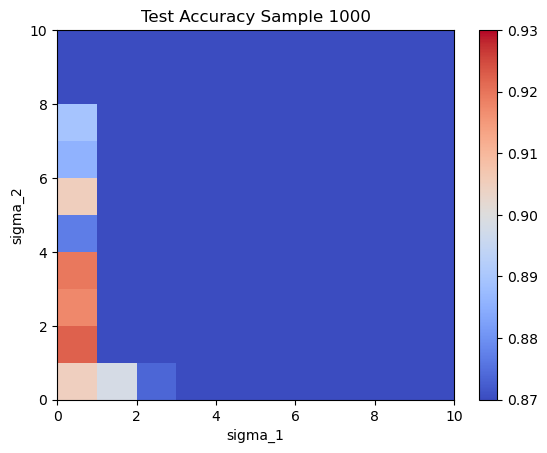

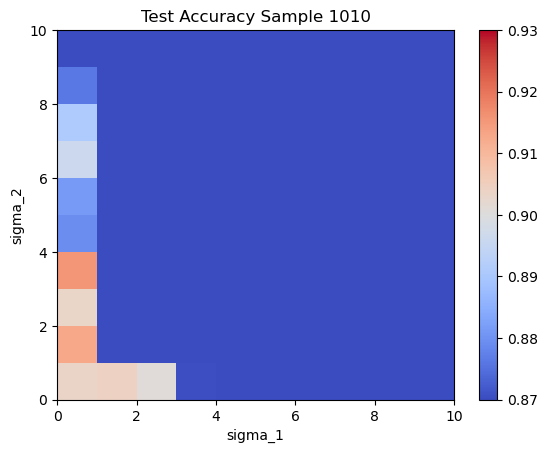

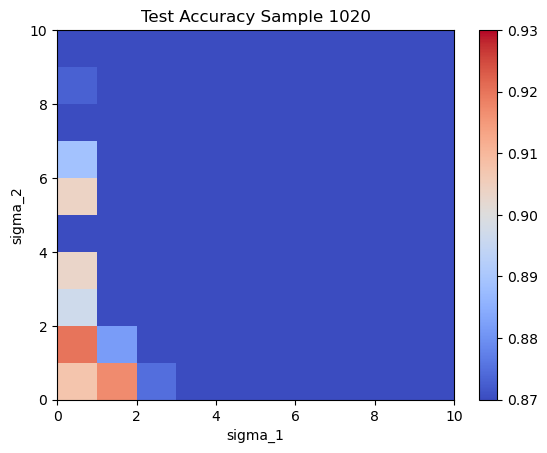

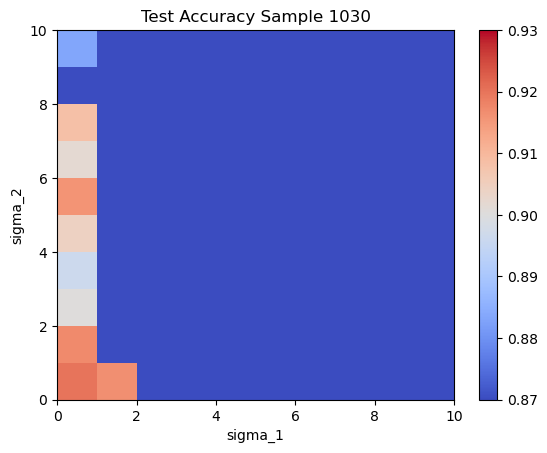

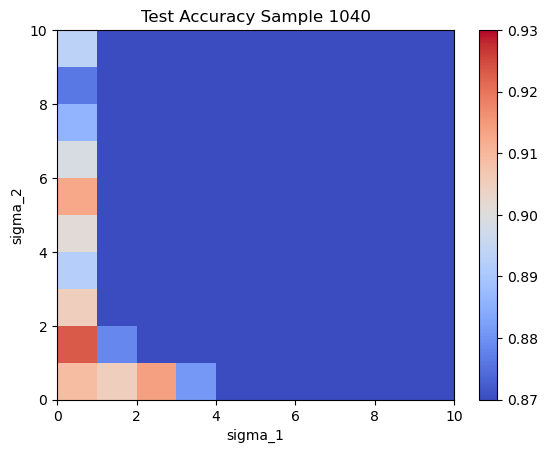

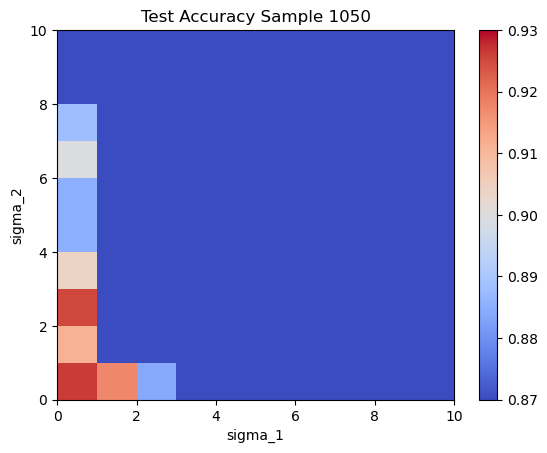

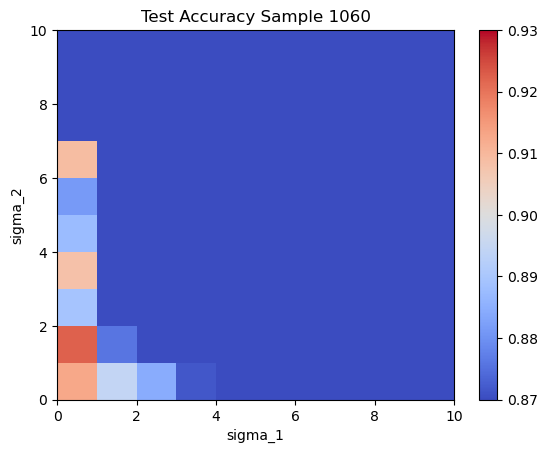

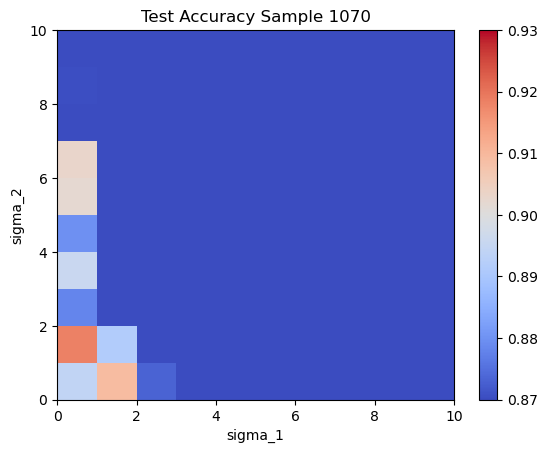

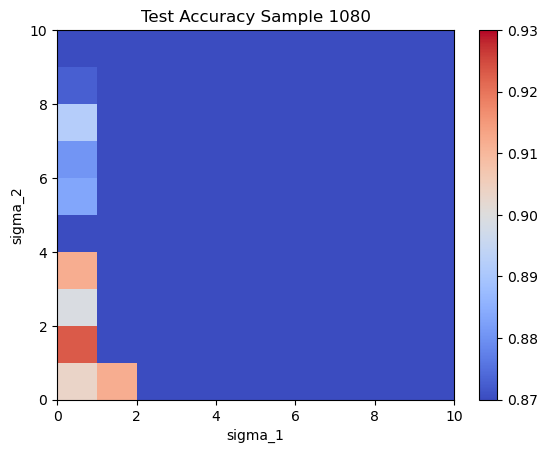

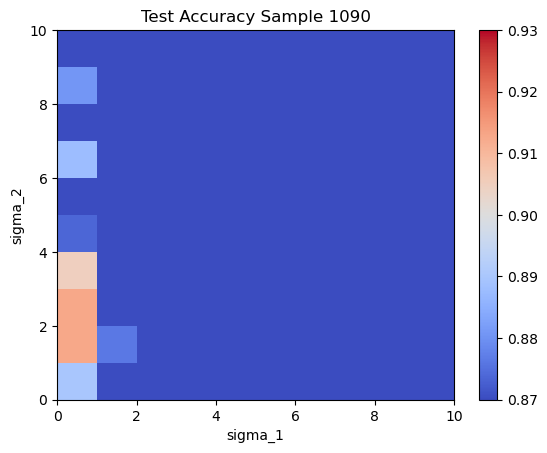

In [56]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('sigma_1')
    ax.set_ylabel('sigma_2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [57]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [58]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90711138, 0.91830929, 0.90274439, 0.90510817, 0.88169071,
        0.89226763, 0.89507212, 0.87334736, 0.86589543, 0.85302484],
       [0.90407652, 0.86984175, 0.82716346, 0.79262821, 0.74385016,
        0.72693309, 0.69994992, 0.69975962, 0.65341546, 0.65416667],
       [0.87744391, 0.82674279, 0.78020833, 0.7211238 , 0.66352163,
        0.61290064, 0.5809996 , 0.53455529, 0.53329327, 0.48959335],
       [0.86054688, 0.8130008 , 0.73253205, 0.6591847 , 0.57042268,
        0.52888622, 0.47850561, 0.44497196, 0.44873798, 0.41548478],
       [0.83917268, 0.79297877, 0.69748598, 0.60757212, 0.49639423,
        0.46566506, 0.42935697, 0.39954928, 0.39499199, 0.37034255],
       [0.82607171, 0.76987179, 0.65099159, 0.56225962, 0.47069311,
        0.41379207, 0.38296274, 0.36150841, 0.35564904, 0.33366386],
       [0.80391627, 0.75857372, 0.62750401, 0.53343349, 0.43882212,
        0.39472155, 0.34714543, 0.33655849, 0.33052885, 0.31453325],
       [0.80729167, 0.74128606, 0.6052484

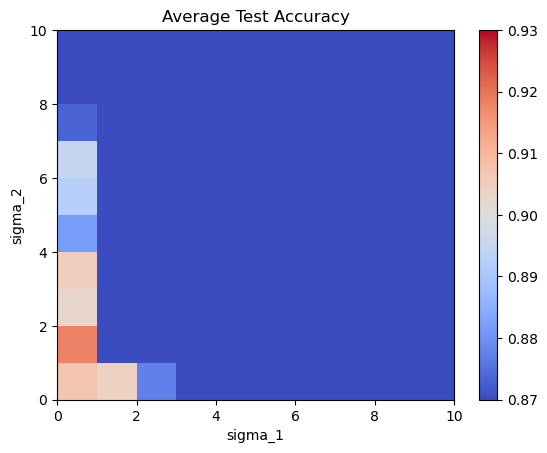

In [59]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_200.png".format(sample))

In [60]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [61]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [62]:
test_best_w1_w2

(0, 1)

In [63]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [64]:
test_best_w1_best_w2

array([0.0125, 0.0275])

In [65]:
data = {}
data['frequency'] = 65
data['N'] = 100
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_100",**data)